# Regression and Moderation

## Load Data

`data = sm.datasets.anes96.data.load_pandas().data`

`data = sm.datasets.grunfeld.data.load_pandas().data  # mlm`

In [2]:
%load_ext autoreload
%autoreload 2

import statsmodels.api as sm
import glmax

print(dir(glmax))

data = sm.datasets.ccard.data.load_pandas().data.rename_axis("subject")
data

['DUMMY_GLOBAL', 'Regression', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'analysis', 'ax', 'class_regression', 'constants', 'mod', 'pl', 'pp', 'processing', 'simulation', 'sm', 'sys', 'tl', 'utils', 'visualization']


,AVGEXP,AGE,INCOME,INCOMESQ,OWNRENT
subject,,,,,
0,124.98,38.0,4.52,20.4304,1.0
1,9.85,33.0,2.42,5.8564,0.0
2,15.00,34.0,4.50,20.2500,1.0
3,137.87,31.0,2.54,6.4516,0.0
4,546.50,32.0,9.79,95.8441,1.0
...,...,...,...,...,...
67,68.38,43.0,2.40,5.7600,0.0
68,474.15,33.0,6.00,36.0000,1.0
69,234.05,25.0,3.60,12.9600,0.0


## Create Model

In [3]:
fml = "AVGEXP ~ INCOME + AGE + OWNRENT + INCOME*AGE*OWNRENT"
self = glmax.Regression(file_path=data, model=fml)

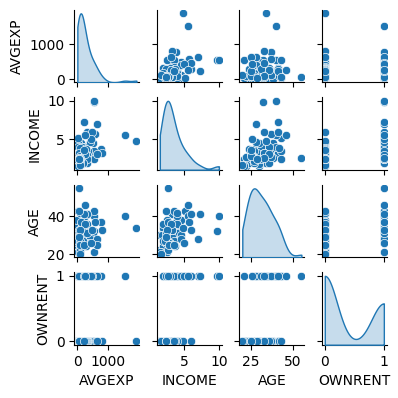

In [4]:
import seaborn as sns

vvv = [i for i in [self.model["y"]] + self.model["x"]]
kind_dist="kde"
diag_kws={"cut": 0, "fill": True}
figsize = (3, 3)
grid_kws = {"diag_sharey": False}

sns.pairplot(self.data[vvv], diag_kind=kind_dist, diag_kws=diag_kws,
             grid_kws=grid_kws, height=1,
             aspect=1)

## Tabulate and Plot Descriptives

### Without Group Color-Coding

/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,
/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,
/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,
/home/elizabeth/glmax/glmax/visualization/plot_descriptives.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data, x=v, ax=axs[i, j], hue=y, palette=palette,


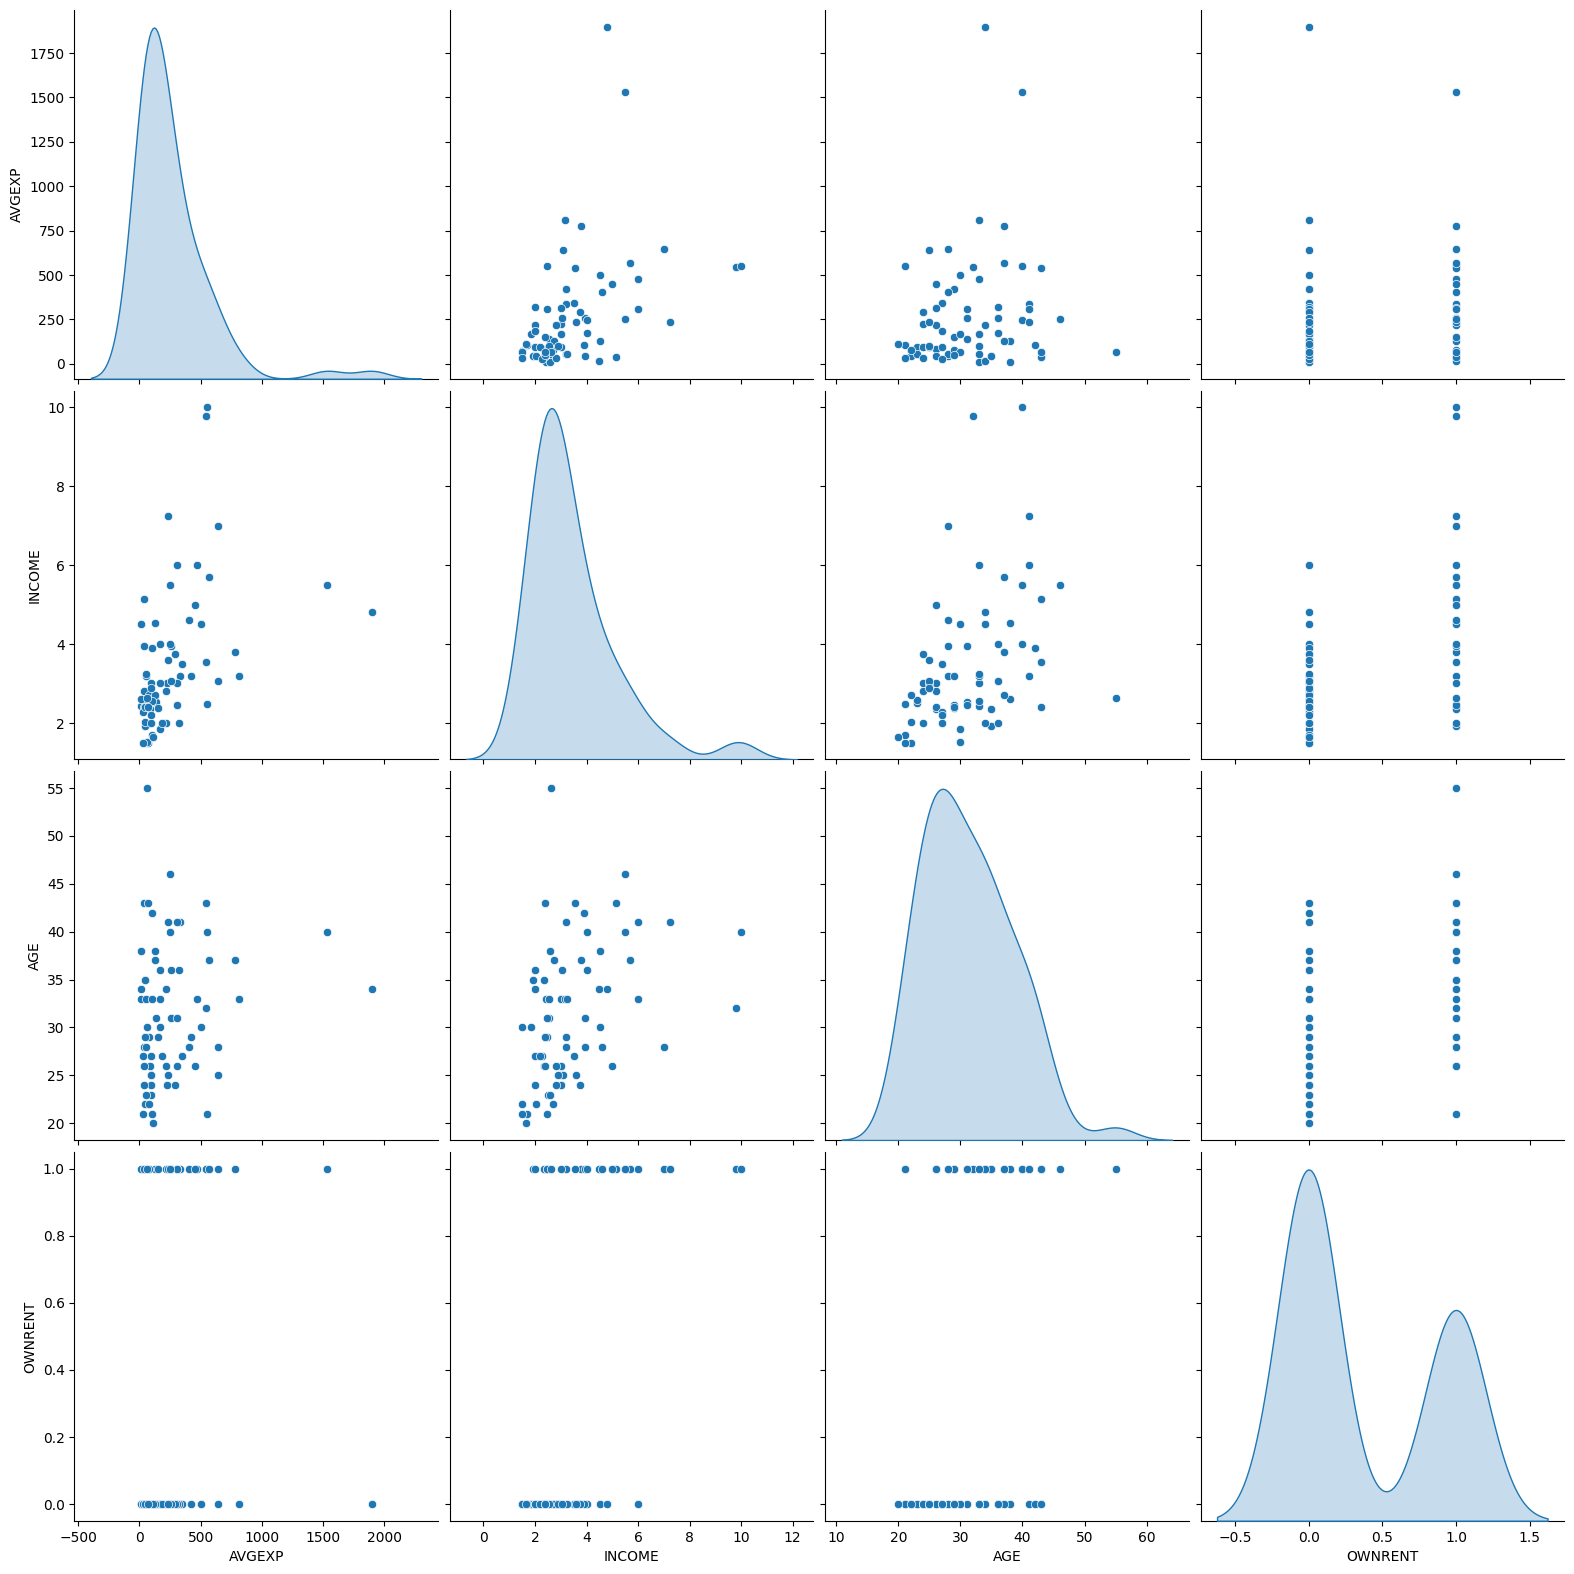

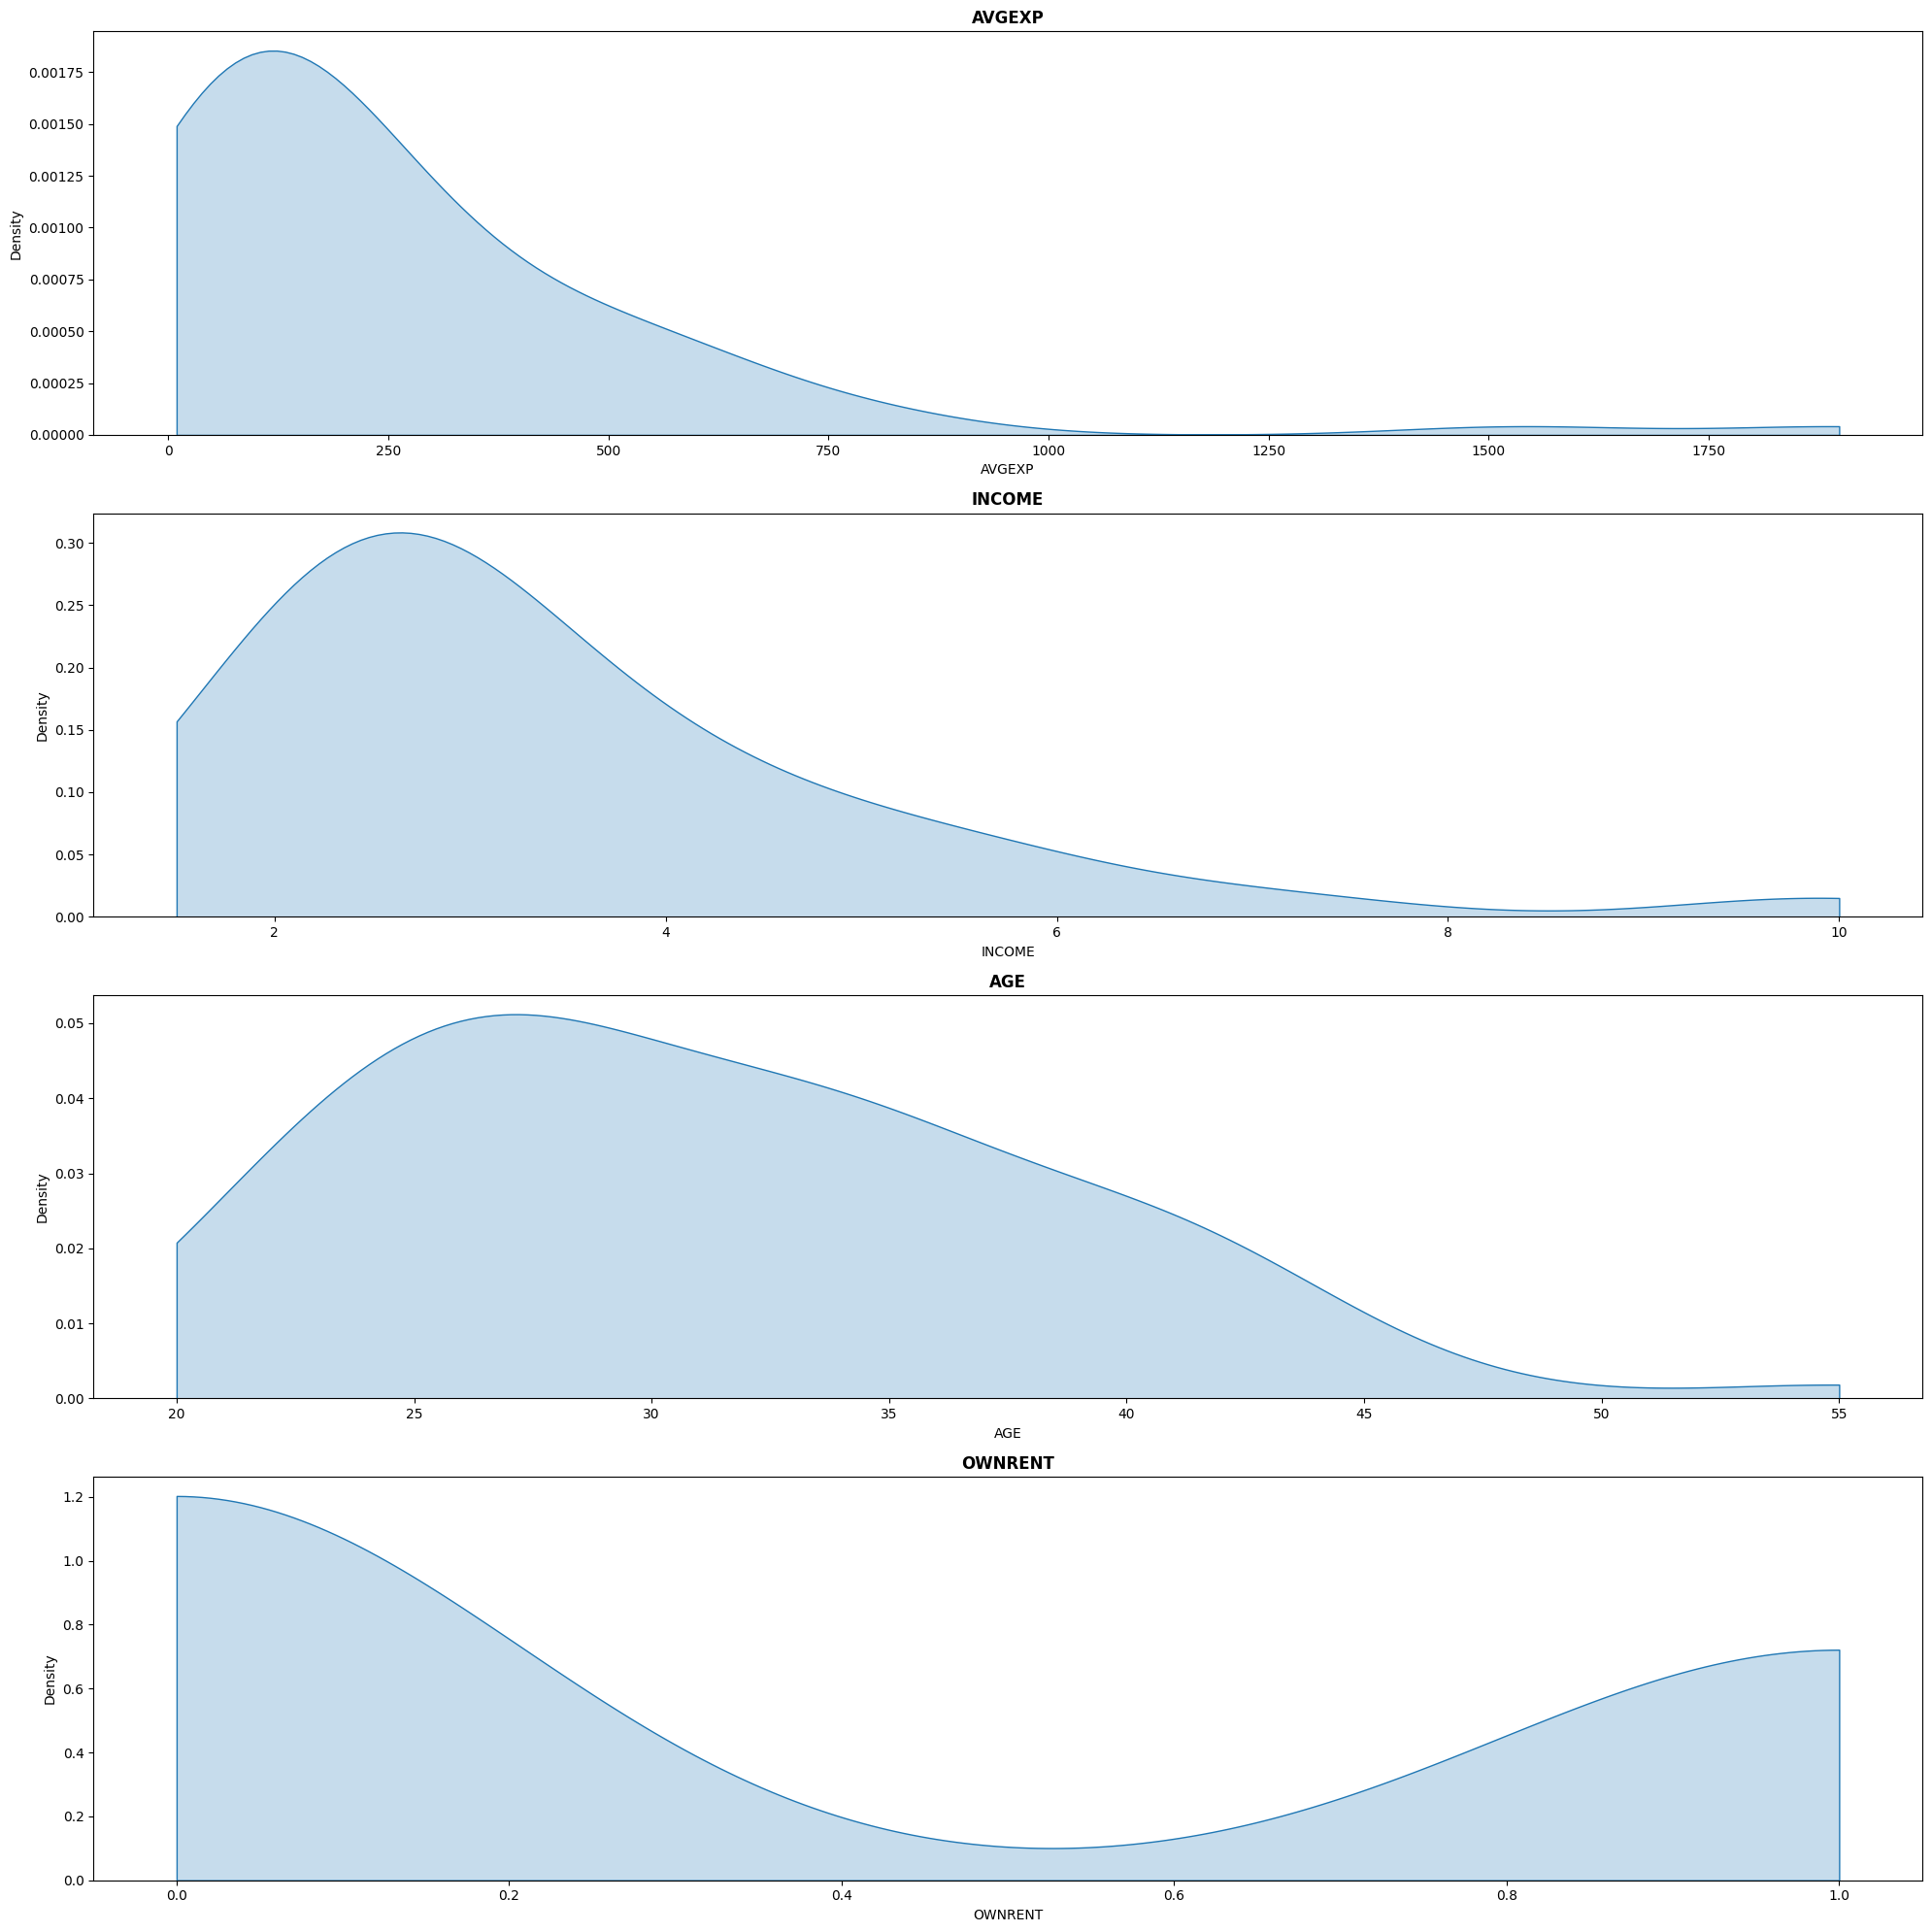

In [5]:
figs = self.describe()

### With Group Color-Coding

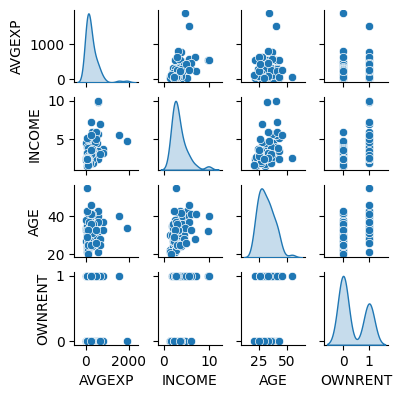

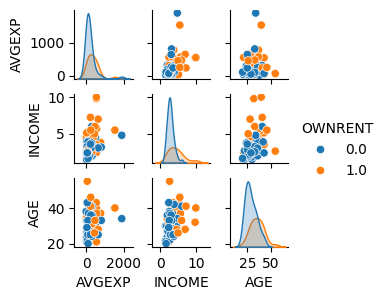

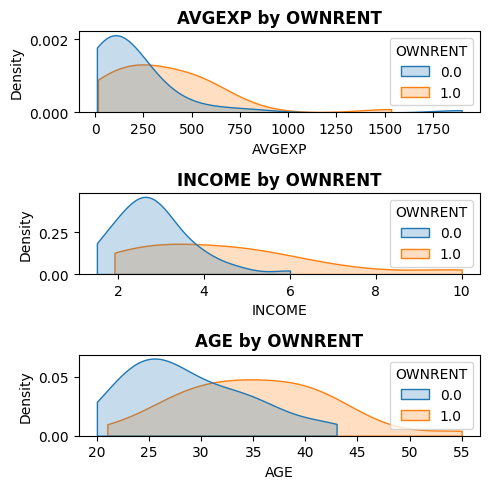

In [6]:
figs = self.describe(groups="OWNRENT", figsize=(5, 5))

## Correlation

                     r      p  p_adjusted
AVGEXP  AVGEXP   1.000  0.000       0.000
        INCOME   0.443  0.000       0.000
        AGE      0.168  0.157       0.157
        OWNRENT  0.243  0.039       0.039
INCOME  AVGEXP   0.443  0.000       0.000
        INCOME   1.000  0.000       0.000
        AGE      0.385  0.001       0.001
        OWNRENT  0.473  0.000       0.000
AGE     AVGEXP   0.168  0.157       0.157
        INCOME   0.385  0.001       0.001
        AGE      1.000  0.000       0.000
        OWNRENT  0.438  0.000       0.000
OWNRENT AVGEXP   0.243  0.039       0.039
        INCOME   0.473  0.000       0.000
        AGE      0.438  0.000       0.000
        OWNRENT  1.000  0.000       0.000


(                        r         p  p_adjusted
 AVGEXP  AVGEXP   1.000000  0.000000    0.000000
         INCOME   0.443135  0.000097    0.000097
         AGE      0.168367  0.157434    0.157434
         OWNRENT  0.243342  0.039422    0.039422
 INCOME  AVGEXP   0.443135  0.000097    0.000097
         INCOME   1.000000  0.000000    0.000000
         AGE      0.385108  0.000837    0.000837
         OWNRENT  0.473079  0.000027    0.000027
 AGE     AVGEXP   0.168367  0.157434    0.157434
         INCOME   0.385108  0.000837    0.000837
         AGE      1.000000  0.000000    0.000000
         OWNRENT  0.438236  0.000118    0.000118
 OWNRENT AVGEXP   0.243342  0.039422    0.039422
         INCOME   0.473079  0.000027    0.000027
         AGE      0.438236  0.000118    0.000118
         OWNRENT  1.000000  0.000000    0.000000,
           AVGEXP   INCOME      AGE  OWNRENT
 AVGEXP    1.0***  0.44***     0.17    0.24*
 INCOME   0.44***   1.0***  0.39***  0.47***
 AGE         0.17  0.39***   1.

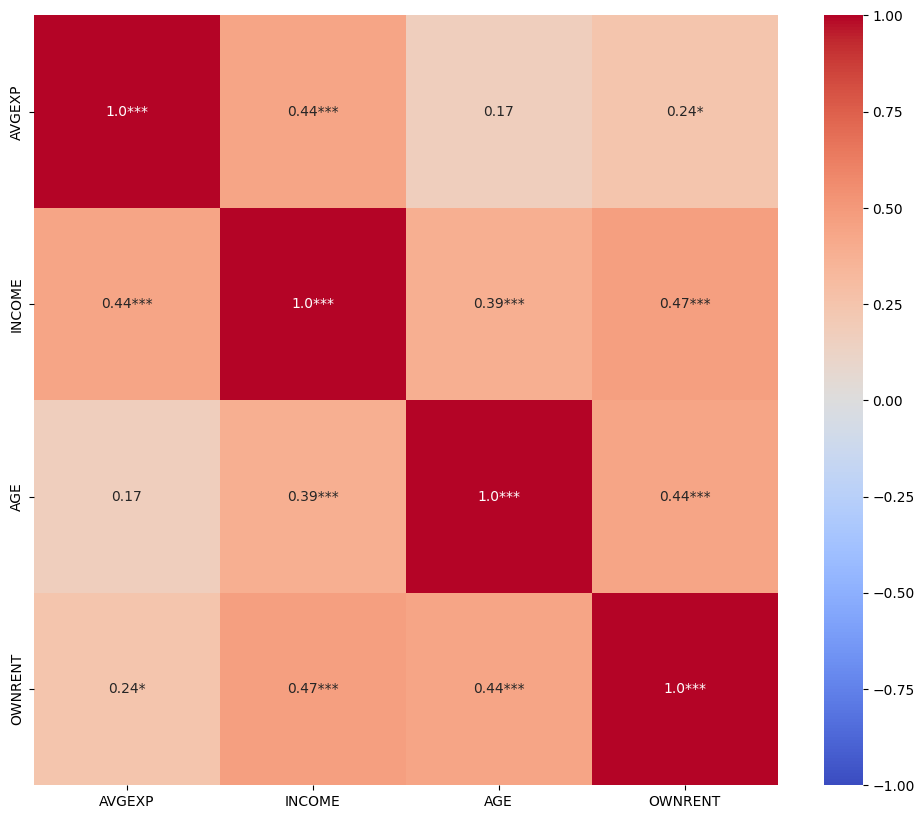

In [7]:
self.correlate()

# See `family` Specifications

In [45]:
glmax.print_models()

Available models:
"binary": [<bound method Model.from_formula of <class 'statsmodels.discrete.discrete_model.Logit'>>]
"count": [<class 'statsmodels.discrete.discrete_model.CountModel'>]
"countmodel": [<class 'statsmodels.discrete.discrete_model.CountModel'>]
"generalizedpoisson": [<class 'statsmodels.discrete.discrete_model.GeneralizedPoisson'>]
"hurdle": [<class 'statsmodels.discrete.truncated_model.HurdleCountModel'>]
"hurdlecountmodel": [<class 'statsmodels.discrete.truncated_model.HurdleCountModel'>]
"logit": [<bound method Model.from_formula of <class 'statsmodels.discrete.discrete_model.Logit'>>]
"mnlogit": [<class 'statsmodels.discrete.discrete_model.MNLogit'>]
"multinomial": [<class 'statsmodels.discrete.discrete_model.MultinomialModel'>]
"multinomialmodel": [<class 'statsmodels.discrete.discrete_model.MultinomialModel'>]
"nbinom": [<class 'statsmodels.discrete.discrete_model.NegativeBinomial'>]
"nbinom_zinf": [<class 'statsmodels.discrete.count_model.ZeroInflatedNegativeBinom

# Moderation

                            OLS Regression Results                            
Dep. Variable:                 AVGEXP   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     3.073
Date:                Mon, 10 Mar 2025   Prob (F-statistic):            0.00745
Time:                        14:10:26   Log-Likelihood:                -506.11
No. Observations:                  72   AIC:                             1028.
Df Residuals:                      64   BIC:                             1046.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -448.9477    632

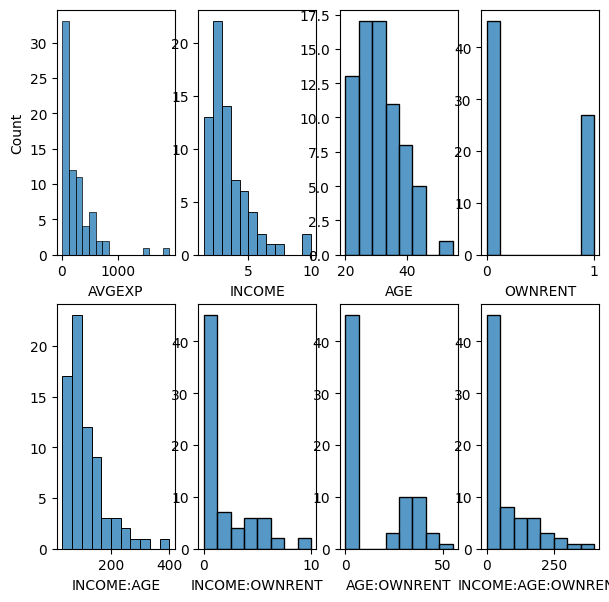

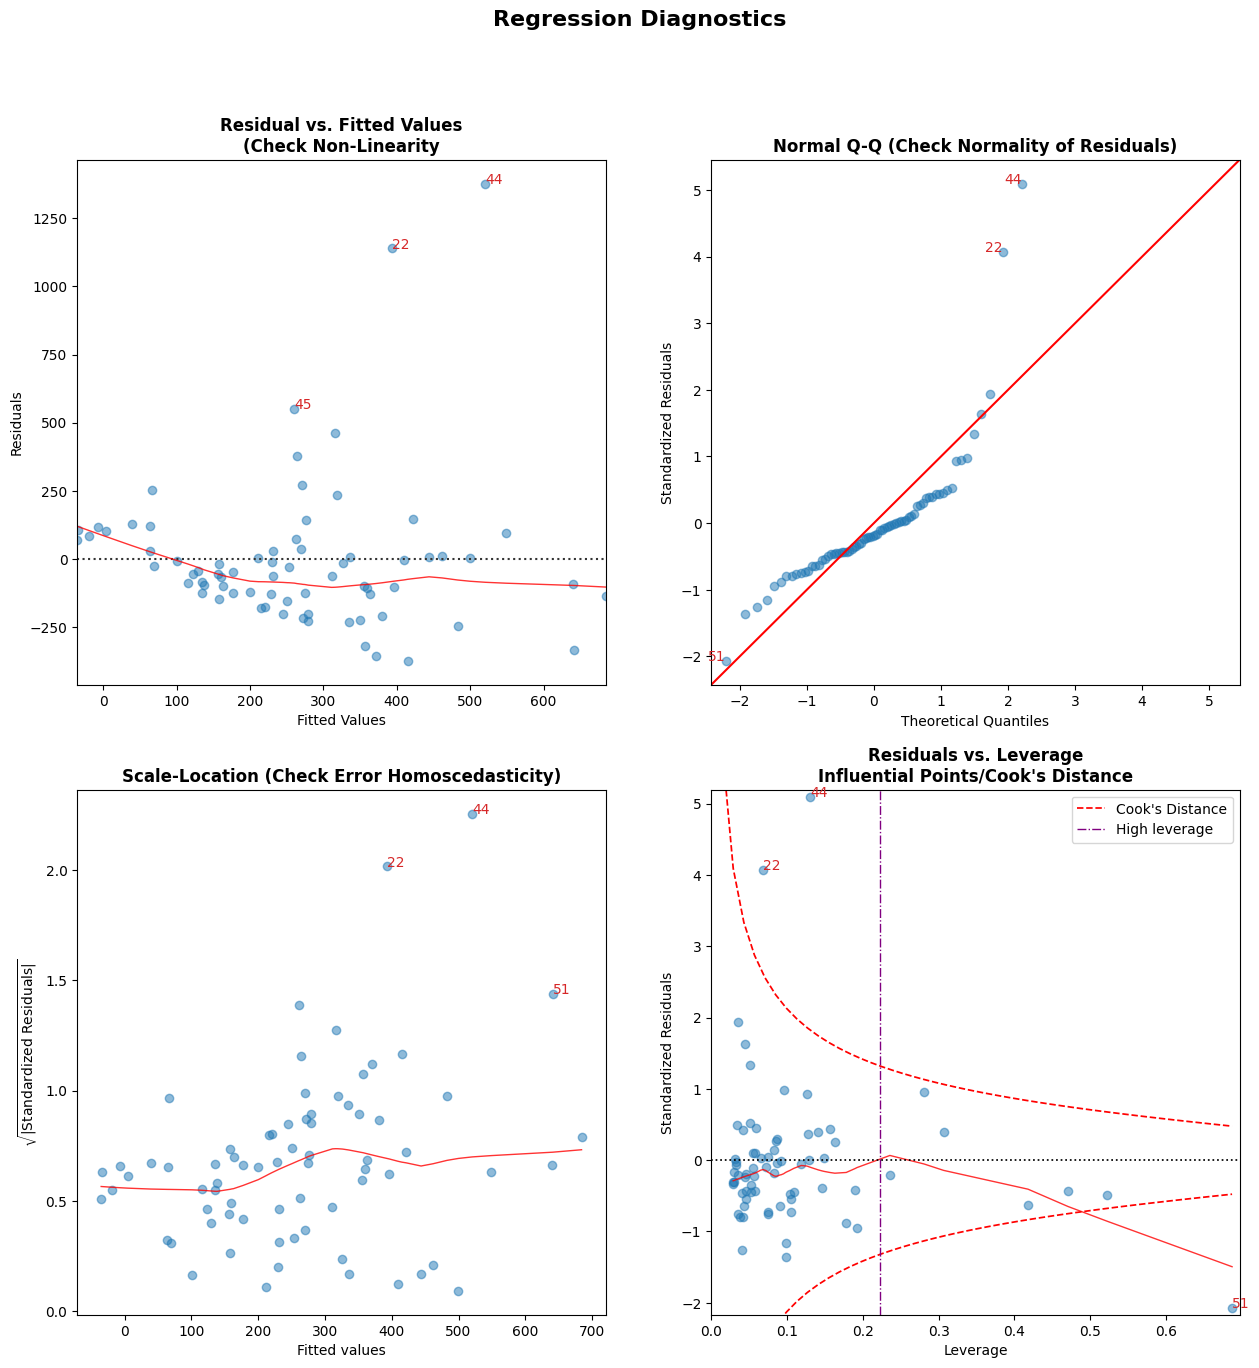

In [22]:
model, summary = self.run(kws_diagnostics=True)

In [24]:
self.run(family="OrderedModel", method="bfgs")

Optimization terminated successfully.
         Current function value: 4.095308
         Iterations: 68
         Function evaluations: 73
         Gradient evaluations: 73

Pseudo-R-Squared:  0.042406404323357405 

                             OrderedModel Results                             
Dep. Variable:                 AVGEXP   Log-Likelihood:                -294.86
Model:                   OrderedModel   AIC:                             745.7
Method:            Maximum Likelihood   BIC:                             923.3
Date:                Mon, 10 Mar 2025                                         
Time:                        14:15:03                                         
No. Observations:                  72                                         
Df Residuals:                      -6                                         
Df Model:                           7                                         
                         coef    std err          z      P>|z|      [0.025

(<statsmodels.miscmodels.ordinal_model.OrderedResultsWrapper at 0x7d6dfc088850>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                              OrderedModel Results                             
 Dep. Variable:                 AVGEXP   Log-Likelihood:                -294.86
 Model:                   OrderedModel   AIC:                             745.7
 Method:            Maximum Likelihood   BIC:                             923.3
 Date:                Mon, 10 Mar 2025                                         
 Time:                        14:15:03                                         
 No. Observations:                  72                                         
 Df Residuals:                      -6                                         
 Df Model:                           7                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------

In [32]:
self.run(family="nbinom")

         Current function value: 6.332574
         Iterations: 35
         Function evaluations: 44
         Gradient evaluations: 44

Pseudo-R-Squared:  0.03645382792324359 

                     NegativeBinomial Regression Results                      
Dep. Variable:                 AVGEXP   No. Observations:                   72
Model:               NegativeBinomial   Df Residuals:                       64
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                 0.03645
Time:                        14:33:09   Log-Likelihood:                -455.95
converged:                      False   LL-Null:                       -473.20
Covariance Type:            nonrobust   LLR p-value:                 1.389e-05
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept         

/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1313: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(<statsmodels.discrete.discrete_model.NegativeBinomialResultsWrapper at 0x7d6dfbe05fc0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                      NegativeBinomial Regression Results                      
 Dep. Variable:                 AVGEXP   No. Observations:                   72
 Model:               NegativeBinomial   Df Residuals:                       64
 Method:                           MLE   Df Model:                            7
 Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                 0.03645
 Time:                        14:33:09   Log-Likelihood:                -455.95
 converged:                      False   LL-Null:                       -473.20
 Covariance Type:            nonrobust   LLR p-value:                 1.389e-05
                          coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------
 Intercept              1.2249      1.864    

In [33]:
self.run(family="nbinom_zinf")

         Current function value: 6.332573
         Iterations: 35
         Function evaluations: 40
         Gradient evaluations: 40

Pseudo-R-Squared:  0.03645387071511297 

                     ZeroInflatedNegativeBinomialP Regression Results                    
Dep. Variable:                            AVGEXP   No. Observations:                   72
Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                       64
Method:                                      MLE   Df Model:                            7
Date:                           Mon, 10 Mar 2025   Pseudo R-squ.:                 0.03645
Time:                                   14:33:33   Log-Likelihood:                -455.95
converged:                                 False   LL-Null:                       -473.20
Covariance Type:                       nonrobust   LLR p-value:                 1.389e-05
                         coef    std err          z      P>|z|      [0.025      0.975]
-----------------

/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1313: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


(<statsmodels.discrete.count_model.ZeroInflatedNegativeBinomialResultsWrapper at 0x7d6dfc08baf0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                      ZeroInflatedNegativeBinomialP Regression Results                    
 Dep. Variable:                            AVGEXP   No. Observations:                   72
 Model:             ZeroInflatedNegativeBinomialP   Df Residuals:                       64
 Method:                                      MLE   Df Model:                            7
 Date:                           Mon, 10 Mar 2025   Pseudo R-squ.:                 0.03645
 Time:                                   14:33:33   Log-Likelihood:                -455.95
 converged:                                 False   LL-Null:                       -473.20
 Covariance Type:                       nonrobust   LLR p-value:                 1.389e-05
                          coef    std err          z      P>|z|      [0.025      0.975]
 -----------------------------------

In [35]:
self.run(family="poisson")
self.run(family="zip")

Optimization terminated successfully.
         Current function value: 86.623703
         Iterations 6

Pseudo-R-Squared:  0.36554564939316325 

                          Poisson Regression Results                          
Dep. Variable:                 AVGEXP   No. Observations:                   72
Model:                        Poisson   Df Residuals:                       64
Method:                           MLE   Df Model:                            7
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.3655
Time:                        14:39:35   Log-Likelihood:                -6236.9
converged:                       True   LL-Null:                       -9830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.8400      0.188     -4.4

/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1313: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)
/home/elizabeth/anaconda3/envs/glmax/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(<statsmodels.discrete.count_model.ZeroInflatedPoissonResultsWrapper at 0x7d6dfbd070a0>,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                      ZeroInflatedPoisson Regression Results                    
 Dep. Variable:                  AVGEXP   No. Observations:                   72
 Model:             ZeroInflatedPoisson   Df Residuals:                       64
 Method:                            MLE   Df Model:                            7
 Date:                 Mon, 10 Mar 2025   Pseudo R-squ.:                  0.3655
 Time:                         14:39:35   Log-Likelihood:                -6236.9
 converged:                       False   LL-Null:                       -9830.3
 Covariance Type:             nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------
 inflate_const        -16.7686    515

# Logistic Regression

In [42]:
model, summary, extras = self.run(
    formula="OWNRENT ~ INCOME + AGE", family="logit")

Optimization terminated successfully.
         Current function value: 0.492144
         Iterations 6

Pseudo-R-Squared:  0.2560897850402025 

                           Logit Regression Results                           
Dep. Variable:                OWNRENT   No. Observations:                   72
Model:                          Logit   Df Residuals:                       69
Method:                           MLE   Df Model:                            2
Date:                Mon, 10 Mar 2025   Pseudo R-squ.:                  0.2561
Time:                        14:48:01   Log-Likelihood:                -35.434
converged:                       True   LL-Null:                       -47.633
Covariance Type:            nonrobust   LLR p-value:                 5.039e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0978      1.570     -3.885      0.000      -9.174 